#  <center>AirBnB Data Analysis for Austin Texas<center>
### <center>by Patrick Bloomingdale<center>

**For this project I will be using the CRoss-Industry Standard Process for Data Mining (CRISP-DM) to analyze AirBnB dataset for Austin Texas.**<br>

In [1]:
#Import Libraries used for data analysis
import pandas as pd
import numpy as np
from collections import defaultdict

#Import date/time Libraries
import calendar
import datetime

#Import Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
#make sure plots render within the notebook
%matplotlib inline 
from matplotlib import pyplot

#Used to build predictive model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import seaborn as sns

In [2]:
#Set the column and row limits to see everything
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)
pd.set_option("display.max_rows",100)

## 1. Business Understaning
Airbnb is an online marketplace (property rental industry) that connects people who want to rent their homes with people are looking for accomidations.  The company has rentals in 191+ countries. <br>
The following questions will used to determine what matters to the customers in the rental industry and how certian factors (variables) are related to each other
1. What is the average price per month and day of the week?
2. What are the top five propertie types by ratings and number of reviews?
3. What is the average review score rating by neighbourhood?
4. What are the factors that influence price and how relevant are they?

## 2. Data Understanding

### Source
I used Austin Airbnb listing and calendar datasets available from Airbnb: http://insideairbnb.com/get-the-data.html. Data: November 12, 22018<br>
### Datasets
| Date Compiled     | City, State   | File Name              | Description                       |
|:----------------: | :-----------: | ---------------------- | ----------------------------------|
| December 16, 2020 | Austin, Texas | listings_austin.csv.gz | Detailed Listings data for Austin |
| December 16, 2020 | Austin, Texas | calendar_austin.csv.gz  | Detailed Calendar Data for listings in Austin |

<br>

In [3]:
#Load CSV files for Austin Texas
df_atx_listing = pd.read_csv('listings_austin.csv.gz', compression='gzip', error_bad_lines=False)
df_atx_calendar = pd.read_csv('calendar_austin.csv.gz', compression='gzip', error_bad_lines=False)

In [4]:
#look at columns and first 5 rows
df_atx_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20201019155524,2020-10-20,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Free street parking"", ""Washer"", ""Heating"", ""...",$179.00,7,180,7,7,180,180,7.0,180.0,NaN,t,0,9,39,129,2020-10-20,24,0,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20201019155524,2020-10-20,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1.0,2.0,"[""Free street parking"", ""Washer"", ""Heating"", ""...",$114.00,30,60,30,30,60,60,30.0,60.0,NaN,t,0,0,0,0,2020-10-20,9,0,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06
2,5456,https://www.airbnb.com/rooms/5456,20201019155524,2020-10-20,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Free street parking"", ""Heating"", ""Long term ...",$95.00,2,90,2,2,90,90,2.0,90.0,NaN,t,29,55,85,360,2020-10-20,536,30,1,2009-03-08,2020-10-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,3.79
3,5636,https://www.airbnb.com/rooms/5636,20201019155524,

In [5]:
#datatypes of columns and missing values
print("Austin Listing---------------------------------------------------")
print(df_atx_listing.info());

Austin Listing---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10305 non-null  int64  
 1   listing_url                                   10305 non-null  object 
 2   scrape_id                                     10305 non-null  int64  
 3   last_scraped                                  10305 non-null  object 
 4   name                                          10305 non-null  object 
 5   description                                   10116 non-null  object 
 6   neighborhood_overview                         6631 non-null   object 
 7   picture_url                                   10304 non-null  object 
 8   host_id                                       10305 non-null  int64  


In [6]:
#datatypes of columns
print("Austin Calendar---------------------------------------------------")
print(df_atx_calendar.info())

Austin Calendar---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761760 entries, 0 to 3761759
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 200.9+ MB
None


## 3. Data Prepration

**Look at the different cities (Neighborhood's) in the Austin and surrounding area**

In [7]:
#Look at the different cities listed in df_atx_listing
nbrhood_vals = df_atx_listing.neighbourhood.value_counts()
nbrhood_vals

Austin, Texas, United States                    6544
Lakeway, Texas, United States                     33
West Lake Hills, Texas, United States             16
Sunset Valley, Texas, United States                7
Bee Cave, Texas, United States                     3
Pflugerville, Texas, United States                 3
Del Valle, Texas, United States                    2
United States                                      2
The Hills, Texas, United States                    2
Austin , Texas, United States                      2
Dripping Springs, Texas, United States             2
Lake Travis, Texas, United States                  2
Lago Vista, Texas, United States                   2
Rollingwood, Texas, United States                  2
Austin, Tx, United States                          2
Westlake Hills, Austin, Texas, United States       1
Clarksville, Texas, United States                  1
Round Rock, Texas, United States                   1
austin, Texas, United States                  

**Clean up the records for Austin, Texas**

In [8]:
#fix the data in the neighbourhood column
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Austin, Tx, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Austin , Texas, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('austin, Texas, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Downtown Austin, Texas, United States', 'Austin, Texas, United States')

In [9]:
#Check to make sure all cities with Austin were combined into one
df_atx_listing.neighbourhood.value_counts()

Austin, Texas, United States                    6550
Lakeway, Texas, United States                     33
West Lake Hills, Texas, United States             16
Sunset Valley, Texas, United States                7
Bee Cave, Texas, United States                     3
Pflugerville, Texas, United States                 3
Lake Travis, Texas, United States                  2
Rollingwood, Texas, United States                  2
Del Valle, Texas, United States                    2
Lago Vista, Texas, United States                   2
United States                                      2
The Hills, Texas, United States                    2
Dripping Springs, Texas, United States             2
Cypress Creek Arm, Texas, United States            1
Westlake Hills, Austin, Texas, United States       1
Round Rock, Texas, United States                   1
Manchaca, Texas, United States                     1
Clarksville, Texas, United States                  1
Name: neighbourhood, dtype: int64

In [10]:
#Create dataframe with Non-Austin Cities and remove United States
df_non_atx = df_atx_listing

#Drop Austin from neighbourhood
df_non_atx = df_non_atx[df_non_atx.neighbourhood != 'Austin, Texas, United States']
df_non_atx = df_non_atx[df_non_atx.neighbourhood != 'United States']

#Remove United States from neighbourhood
df_non_atx['neighbourhood'] = df_non_atx['neighbourhood'].str.replace(', Texas, United States','')

df_non_atx_vals = df_non_atx.neighbourhood.value_counts()

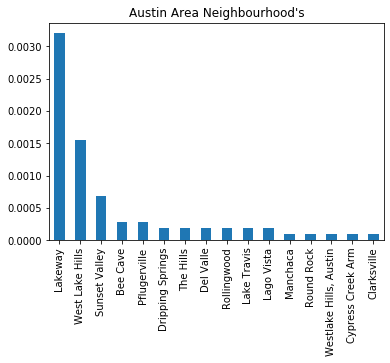

In [11]:
#bar chart of Austin Area with Austin Texas removed
(df_non_atx_vals/df_atx_listing.shape[0]).plot(kind="bar");
plt.title("Austin Area Neighbourhood's");

**Look at the different property types in the Austin and surrounding area**

In [12]:
#What are the different property types?
property_type_vals = df_atx_listing.property_type.value_counts()
#Top 20 Property Values
property_type_vals = property_type_vals.head(20)
property_type_vals

Entire house                   3049
Entire apartment               1867
Private room in house          1330
Entire condominium              836
Entire serviced apartment       601
Entire guesthouse               470
Private room in apartment       407
Entire townhouse                259
Entire bungalow                 225
Entire guest suite              208
Private room in townhouse       129
Entire loft                     125
Private room in condominium      99
Camper/RV                        78
Shared room in apartment         73
Entire cottage                   62
Tiny house                       48
Entire villa                     44
Shared room in house             41
Private room in guest suite      38
Name: property_type, dtype: int64

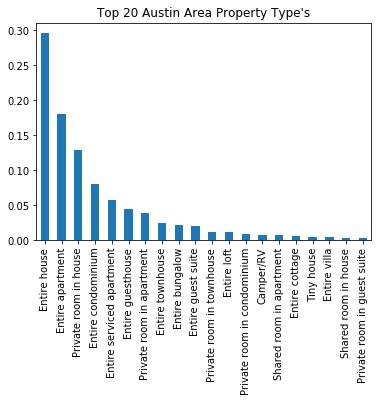

In [13]:
#bar chart of the proportion of the top 20 property types
(property_type_vals/df_atx_listing.shape[0]).plot(kind="bar");
plt.title("Top 20 Austin Area Property Type's");

**Create new columns and convert data types**

In [14]:
#convert bedrooms, accomodates  to int
df_atx_listing.bedrooms = df_atx_listing.bedrooms.fillna(0).astype(int)

In [15]:
#Convert objects to floats
df_atx_listing['price_new'] = df_atx_listing['price']
df_atx_calendar['price_new'] = df_atx_calendar['price']
df_atx_calendar['adjusted_price_new'] = df_atx_calendar['adjusted_price']

df_atx_listing['price_new'] = df_atx_listing['price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')
df_atx_calendar['price_new'] = df_atx_calendar['price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')
df_atx_calendar['adjusted_price_new'] = df_atx_calendar['adjusted_price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')

**Will need to convert the some data types before I can begin my analysis:**

In [16]:
#Convert Dates
df_atx_listing.host_since = pd.to_datetime(df_atx_listing.host_since)
df_atx_listing.last_scraped = pd.to_datetime(df_atx_listing.last_scraped)

df_atx_calendar.date = pd.to_datetime(df_atx_calendar.date)

In [17]:
#Create year, month, day, weekday, weekday_number variables
df_atx_calendar['year'] = df_atx_calendar['date'].dt.year 
df_atx_calendar['month'] = df_atx_calendar.date.dt.strftime("%b")
df_atx_calendar['day'] = df_atx_calendar['date'].dt.day
df_atx_calendar['weekday'] = df_atx_calendar['date'].dt.weekday
df_atx_calendar['weekday_number'] = df_atx_calendar['date'].dt.weekday

In [18]:
#Create weekend column (Friday and Saturday)
weekend = [4,5]
df_atx_calendar['weekend'] = df_atx_calendar.weekday.isin(weekend)

In [19]:
#Convert weekday from number to day of the week
df_atx_calendar['weekday'] = df_atx_calendar['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [20]:
#Check to make sure dates were converted
print('---------------LISTING---------------------------')
print(df_atx_listing.dtypes)
print('----------------REVIEWS--------------------------')
print(df_atx_calendar.dtypes)

---------------LISTING---------------------------
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_

In [21]:
#Find Values with null values
df_atx_listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
description                                       189
neighborhood_overview                            3674
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           3
host_since                                          3
host_location                                      23
host_about                                       3962
host_response_time                               4134
host_response_rate                               4134
host_acceptance_rate                             3129
host_is_superhost                                   3
host_thumbnail_url          

In [22]:
#Percentage of missing data
missing_data_percentage = df_atx_listing.isnull().sum()/df_atx_listing.shape[0]
missing_data_percentage.sort_values(ascending=False)

neighbourhood_group_cleansed                    1.000000
license                                         1.000000
calendar_updated                                1.000000
bathrooms                                       1.000000
host_response_rate                              0.401164
host_response_time                              0.401164
host_about                                      0.384474
neighborhood_overview                           0.356526
neighbourhood                                   0.356526
host_acceptance_rate                            0.303639
review_scores_location                          0.278214
review_scores_value                             0.278117
review_scores_communication                     0.277729
review_scores_checkin                           0.277729
review_scores_cleanliness                       0.277632
review_scores_accuracy                          0.277632
review_scores_rating                            0.271713
last_review                    

**Drop columns not going to use**

In [23]:
#Drop columns not going to use
df_atx_listing = df_atx_listing.drop(['neighborhood_overview',                     
                                      'picture_url',                     
                                      'host_url',                     
                                      'host_about',                     
                                      'host_since',                
                                      'last_scraped',
                                      'host_name', 
                                      'description',
                                      'host_response_time',                 
                                      'listing_url', 
                                      'host_thumbnail_url',
                                      'host_picture_url',
                                      'host_verifications',
                                      'amenities',
                                      'number_of_reviews_ltm',
                                      'number_of_reviews_l30d',
                                      'calendar_last_scraped',                 
                                      'calculated_host_listings_count',
                                      'calculated_host_listings_count_entire_homes',
                                      'calculated_host_listings_count_private_rooms',
                                      'host_response_rate',
                                      'host_acceptance_rate',
                                      'availability_30',
                                      'availability_60', 
                                      'availability_90',
                                      'availability_365',
                                      'host_has_profile_pic',
                                      'host_identity_verified',
                                      'neighbourhood_group_cleansed',
                                      'bathrooms',
                                      'bathrooms_text',
                                      'calendar_updated',
                                     'first_review',
                                      'last_review',
                                      'calculated_host_listings_count_shared_rooms',
                                      'license'],axis = 1)

In [24]:
df_atx_listing.head()

,id,scrape_id,name,host_id,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_new
0,2265,20201019155524,Zen-East in the Heart of Austin (monthly rental),2466,"Austin, Texas, United States",f,East Downtown,3.0,3.0,NaN,78702,30.27750,-97.71398,Entire house,Entire home/apt,4,2,2.0,$179.00,7,180,7,7,180,180,7.0,180.0,t,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,0.17,179.0
1,5245,20201019155524,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,"Austin, Texas, United States",f,East Downtown,3.0,3.0,NaN,78702,30.27577,-97.71379,Private room in house,Private room,2,1,2.0,$114.00,30,60,30,30,60,60,30.0,60.0,t,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.06,114.0
2,5456,20201019155524,"Walk to 6th, Rainey St and Convention Ctr",8028,"Austin, Texas, United States",t,East Downtown,1.0,1.0,"Austin, Texas, United States",78702,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,1,2.0,$95.00,2,90,2,2,90,90,2.0,90.0,t,536,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.79,95.0
3,5636,20201019155524,"Soco, Barton Springs Private Guest Cottage",7148,"Austin, Texas, United States",f,Bouldin Creek,1.0,1.0,"Austin, Texas, United States",78704,30.24630,-97.76361,Entire apartment,Entire home/apt,2,1,1.0,$46.00,30,90,30,30,90,90,30.0,90.0,t,20,95.0,9.0,10.0,10.0,10.0,10.0,9.0,t,0.14,46.0
4,5769,20201019155524,NW Austin Room,8186,"Austin, Texas, United States",t,SW Williamson Co.,1.0,1.0,"Austin, Texas, United States",78729,30.45697,-97.78422,Private room in house,Private room,2,1,1.0,$39.00,1,14,1,1,14,14,1.0,14.0,t,257,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.00,39.0


In [25]:
df_atx_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_new,adjusted_price_new,year,month,day,weekday,weekday_number,weekend
0,2482916,2020-10-21,f,$500.00,$500.00,1.0,1125.0,500.0,500.0,2020,Oct,21,Wednesday,2,False
1,2482916,2020-10-22,f,$625.00,$625.00,1.0,1125.0,625.0,625.0,2020,Oct,22,Thursday,3,False
2,2482916,2020-10-23,f,$625.00,$625.00,2.0,1125.0,625.0,625.0,2020,Oct,23,Friday,4,True
3,2482916,2020-10-24,f,$625.00,$625.00,2.0,1125.0,625.0,625.0,2020,Oct,24,Saturday,5,True
4,2482916,2020-10-25,f,$625.00,$625.00,1.0,1125.0,625.0,625.0,2020,Oct,25,Sunday,6,False


In [26]:
#create a new column for available that is binary
df_atx_listing['host_is_superhost'] = df_atx_listing['host_is_superhost'].map(lambda available: 1 if available == 't' else 0)
df_atx_listing['has_availability'] = df_atx_listing['has_availability'].map(lambda available: 1 if available == 't' else 0)
df_atx_listing['instant_bookable'] = df_atx_listing['instant_bookable'].map(lambda available: 1 if available == 't' else 0)

df_atx_calendar['available'] = df_atx_calendar['available'].map(lambda available: 1 if available == 't' else 0)
df_atx_calendar['weekend'] = df_atx_calendar['weekend'].map(lambda available: 1 if available == 'True' else 0)

### Question 1: What is the average price per month and day of the week?

In [27]:
#Use groupby to find the average price by month
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_price_sort = df_atx_calendar.groupby('month')['price_new'].apply(lambda x: x.mean())
month_price_sort.reindex(Months, axis=0)

month
Jan    276.357597
Feb    292.956283
Mar    325.401861
Apr    321.538316
May    335.453094
Jun    348.307873
Jul    362.293544
Aug    384.198641
Sep    389.189206
Oct    349.768286
Nov    266.664832
Dec    271.911841
Name: price_new, dtype: float64

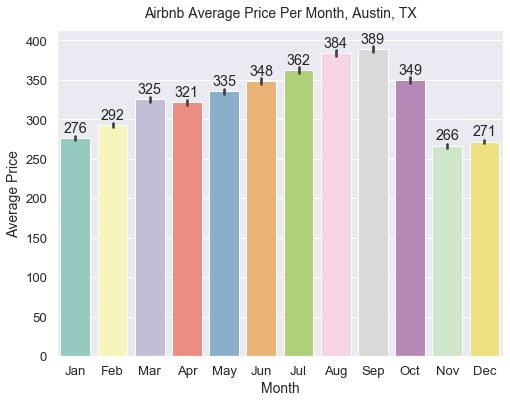

<Figure size 432x288 with 0 Axes>

In [28]:
#AVG Price Per Month Chart
df_copy = df_atx_calendar.copy()

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.set(style='darkgrid', 
        font_scale=1.2)

plt.figure(figsize=(8, 6))

df_copy=sns.barplot(x="month",
                    y="price_new",
                    data=df_copy,
                    order=Months,
                    palette='Set3')

for p in df_copy.patches:
    df_copy.annotate(str(int(p.get_height())), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')    

plt.title("Airbnb Average Price Per Month, Austin, TX", y=1.02, fontsize=14)
plt.xlabel("Month", size=14)
plt.ylabel("Average Price", size=14)
plt.show()
plt.savefig("avg_mo_price.png")

In [29]:
#Use groupby to find the average price by day of the week
Weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

month_price_sort = df_atx_calendar.groupby('weekday')['price_new'].apply(lambda x: x.mean())
month_price_sort.reindex(Weekdays, axis=0)

weekday
Monday       317.860749
Tuesday      317.550364
Wednesday    317.347229
Thursday     322.178289
Friday       347.136067
Saturday     347.776358
Sunday       320.919068
Name: price_new, dtype: float64

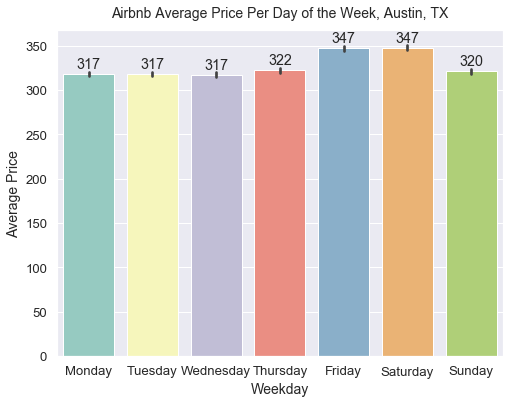

<Figure size 432x288 with 0 Axes>

In [30]:
df_copy = df_atx_calendar.copy()

Weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sns.set(style='darkgrid', 
        font_scale=1.2)

plt.figure(figsize=(8, 6))

df_copy=sns.barplot(x="weekday",
                    y="price_new",
                    data=df_copy,
                    order=Weekdays,
                    palette='Set3')

for p in df_copy.patches:
    df_copy.annotate(str(int(p.get_height())), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')    

plt.title("Airbnb Average Price Per Day of the Week, Austin, TX", y=1.02, fontsize=14)
plt.xlabel("Weekday", size=14)
plt.ylabel("Average Price", size=14)
plt.show()
plt.savefig("avg_weekday_price.png")

### Question 1: Answer
- The average price per month is highest in September 389.19 and lowest in November 266.66
- The average price per day is the highest on Friday 347 and Saturday 347.
- The average price per day is lowest towards the beginning of the week (Monday, Tuesday, Wednesday).

### Question 2: What are the top five propertie types by ratings and number of reviews?

In [31]:
#Use groupby to find the number of reviews by property type
property_reviews_sort = df_atx_listing.groupby('property_type')['number_of_reviews'].apply(lambda x: x.count())
property_reviews_sort.sort_values(ascending = False)

property_type
Entire house                          3049
Entire apartment                      1867
Private room in house                 1330
Entire condominium                     836
Entire serviced apartment              601
Entire guesthouse                      470
Private room in apartment              407
Entire townhouse                       259
Entire bungalow                        225
Entire guest suite                     208
Private room in townhouse              129
Entire loft                            125
Private room in condominium             99
Camper/RV                               78
Shared room in apartment                73
Entire cottage                          62
Tiny house                              48
Entire villa                            44
Shared room in house                    41
Private room in guest suite             38
Private room in bungalow                30
Private room in bed and breakfast       24
Room in boutique hotel                  

In [32]:
#Get the median number of reviews and only select properties that have >= to that value
df_copy = df_atx_listing.copy()
# Drop rows with missing review scores rating
df_copy = df_atx_listing.dropna(subset=['review_scores_rating'], axis=0)

#Find the median value
reviews_median = df_copy['number_of_reviews'].median()
print("The median value is {}".format(reviews_median))

The median value is 13.0


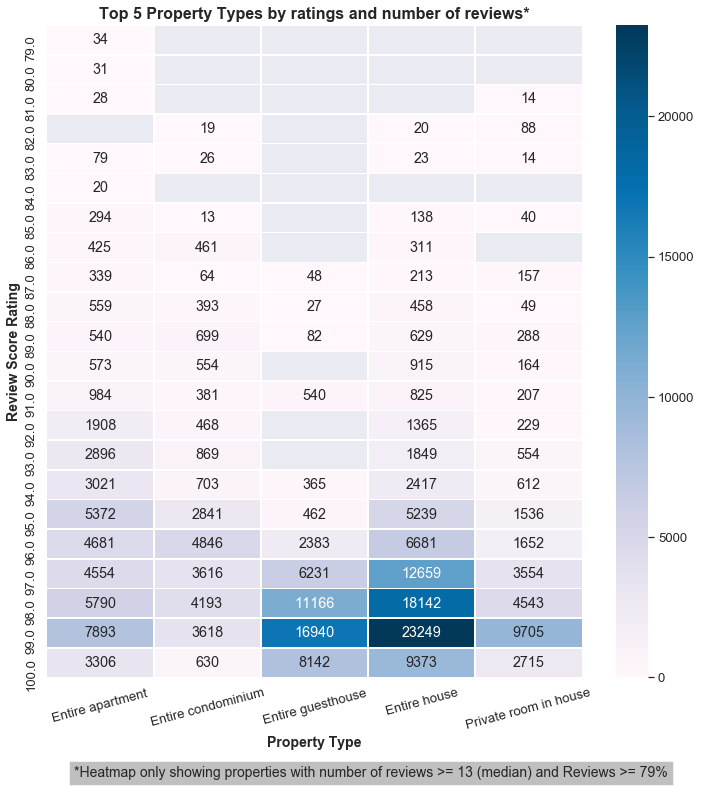

In [33]:
#Create a heatmap using property type, number of reviews, and rating
# Create copy of df_atx_listing
df_copy = df_atx_listing.copy()

#filter data to use only values >= the median of 13, and ratings 79% and above
df_copy = df_copy[(df_copy.number_of_reviews >= 13) & (df_copy.review_scores_rating > .8) ]

#Drop any rows with missing values
df_copy['number_of_reviews']  =  df_copy['number_of_reviews'].dropna()
df_copy['review_scores_rating']  =  df_copy['review_scores_rating'].dropna()

# remove SettingWithCopyWarning 
pd.options.mode.chained_assignment = None  

neighborhood_price = df_copy.groupby(df_copy['property_type'])['number_of_reviews'].sum()
neighborhood_price_indx = neighborhood_price.sort_values(ascending=False)[:5].index
neighborhood_price_pivot = pd.pivot_table(data = df_copy[df_copy['property_type'].isin(neighborhood_price_indx)],
                                      index=['review_scores_rating'],
                                      columns=['property_type'],
                                      values=['number_of_reviews'],
                                      aggfunc='sum')

fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(neighborhood_price_pivot['number_of_reviews'],
            vmin=0,
            annot=True,
            fmt = 'g',
            linewidth=.5,
            ax=ax,
            cmap='PuBu')
sns.set(font_scale = 1)

plt.title('Top 5 Property Types by ratings and number of reviews*', 
          fontsize = 16,
          fontweight='bold')
plt.xlabel('Property Type',
          fontsize = 14,
          fontweight='bold')
plt.ylabel('Review Score Rating',
          fontsize = 14,
          fontweight='bold');
plt.xticks(rotation = 15)
plt.figtext(0.5, 
            0.01, 
            "*Heatmap only showing properties with number of reviews >= 13 (median) and Reviews >= 79%", 
            ha="center", 
            fontsize=14, 
            bbox={"facecolor":"gray", "alpha":0.5, "pad":5})
plt.savefig("top_ratings_reviews.png")

### Question 2: Answer
Looking at scores between 90 and 100, entire house was rated the highest and had the most reviews, followed by:
- Entire guesthouse
- Entire apartment
- Private room in house
- Entire condominium

### Question 3: What is the average review score rating by neighbourhood?

In [34]:
#Average review score rating by neighbourhood
df_atx_listing.groupby(['neighbourhood']).mean()['review_scores_rating'].sort_values(ascending = False)

neighbourhood
Clarksville, Texas, United States               100.000000
Rollingwood, Texas, United States               100.000000
Dripping Springs, Texas, United States           99.500000
Bee Cave, Texas, United States                   99.333333
Del Valle, Texas, United States                  99.000000
Lago Vista, Texas, United States                 98.500000
Lake Travis, Texas, United States                97.000000
Austin, Texas, United States                     96.581323
Lakeway, Texas, United States                    96.200000
Westlake Hills, Austin, Texas, United States     96.000000
West Lake Hills, Texas, United States            95.454545
Manchaca, Texas, United States                   94.000000
United States                                    94.000000
Sunset Valley, Texas, United States              91.500000
Pflugerville, Texas, United States               90.500000
The Hills, Texas, United States                  90.000000
Round Rock, Texas, United States          

### Question 3: Answer
The top five neighbourhoods with the highest review score rating were Clarksville and Rollingwood at 100%, followed by:
- Dripping Springs (99.5%)
- Bee Cave (99.3%)
- Del Valle (99.0%)

## 4) Modeling

### Question: What are the factors that influence price and how relevant are they?

In [35]:
df_atx_listing.head()

,id,scrape_id,name,host_id,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_new
0,2265,20201019155524,Zen-East in the Heart of Austin (monthly rental),2466,"Austin, Texas, United States",0,East Downtown,3.0,3.0,NaN,78702,30.27750,-97.71398,Entire house,Entire home/apt,4,2,2.0,$179.00,7,180,7,7,180,180,7.0,180.0,1,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,0,0.17,179.0
1,5245,20201019155524,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,"Austin, Texas, United States",0,East Downtown,3.0,3.0,NaN,78702,30.27577,-97.71379,Private room in house,Private room,2,1,2.0,$114.00,30,60,30,30,60,60,30.0,60.0,1,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,0,0.06,114.0
2,5456,20201019155524,"Walk to 6th, Rainey St and Convention Ctr",8028,"Austin, Texas, United States",1,East Downtown,1.0,1.0,"Austin, Texas, United States",78702,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,1,2.0,$95.00,2,90,2,2,90,90,2.0,90.0,1,536,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3.79,95.0
3,5636,20201019155524,"Soco, Barton Springs Private Guest Cottage",7148,"Austin, Texas, United States",0,Bouldin Creek,1.0,1.0,"Austin, Texas, United States",78704,30.24630,-97.76361,Entire apartment,Entire home/apt,2,1,1.0,$46.00,30,90,30,30,90,90,30.0,90.0,1,20,95.0,9.0,10.0,10.0,10.0,10.0,9.0,1,0.14,46.0
4,5769,20201019155524,NW Austin Room,8186,"Austin, Texas, United States",1,SW Williamson Co.,1.0,1.0,"Austin, Texas, United States",78729,30.45697,-97.78422,Private room in house,Private room,2,1,1.0,$39.00,1,14,1,1,14,14,1.0,14.0,1,257,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.00,39.0


In [36]:
df_atx_listing.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_new
count,1.030500e+04,1.030500e+04,1.030500e+04,10305.000000,10302.000000,10302.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10253.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.0,10305.000000,7505.000000,7444.000000,7444.000000,7443.000000,7443.000000,7438.000000,7439.000000,10305.000000,7619.000000,10305.000000
mean,2.509873e+07,2.020102e+13,9.194110e+07,0.359049,69.637546,69.637546,78722.906259,30.282216,-97.752554,4.589811,1.786997,2.440652,8.661426,606.312082,7.975546,9.000097,740.500243,755.024066,8.413265,747.492926,1.0,30.841145,96.127915,9.762493,9.602499,9.852882,9.843074,9.791880,9.596048,0.497914,1.323224,269.345120
std,1.442765e+07,3.308754e+00,1.080553e+08,0.479745,241.529234,241.529234,20.801187,0.061437,0.057906,3.041782,1.274886,2.618386,24.200443,517.458257,22.604879,24.600786,499.721122,493.543700,23.366535,495.795191,0.0,66.108801,7.252795,0.718285,0.841838,0.614252,0.644026,0.618811,0.806761,0.500020,1.713127,591.437878
min,2.265000e+03,2.020102e+13,2.300000e+01,0.000000,0.000000,0.000000,78701.000000,30.078870,-98.056630,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.010000,0.000000
25%,1.238537e+07,2.020102e+13,1.059533e+07,0.000000,1.000000,1.000000,78704.000000,30.245390,-97.770430,2.000000,1.000000,1.000000,1.000000,30.000000,1.000000,2.000000,60.000000,100.000000,1.100000,90.000000,1.0,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,0.160000,81.390000
50%,2.399578e+07,2.020102e+13,4.312843e+07,0.000000,1.000000,1.000000,78721.000000,30.269560,-97.744600,4.000000,1.000000,2.000000,2.000000,365.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,1.0,5.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.670000,133.000000
75%,3.892576e+07,2.020102e+13,1.380076e+08,1.000000,4.000000,4.000000,78744.000000,30.305370,-97.720270,6.000000,2.000000,3.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,1.0,29.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.880000,260.000000
max,4.594346e+07,2.020102e+13,3.717185e+08,1.000000,2143.000000,2143.000000,78759.000000,30.515280,-97.560620,16.000000,23.000000,132.000000,999.000000,1825.000000,999.000000,999.000000,1825.000000,1825.000000,999.000000,1825.000000,1.0,951.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,23.860000,10754.000000


### Determine which columns are numerical and categorical

In [37]:
# Subset to a dataframe only holding the quantitative columns
num_df_listing = df_atx_listing.select_dtypes(include=['int64', 'float64']).copy()

# Print how many numerical columns are in the dataframe
print("Total Numerical Columns:  {}".format(num_df_listing.shape[1]))

Total Numerical Columns:  31


In [38]:
# Subset to a dataframe only holding the categorical columns
cat_df_listing = df_atx_listing.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe
print("Total Categorical Columns:  {}".format(cat_df_listing.shape[1]))

Total Categorical Columns:  7


### Create the linear model
1. Split data into train and test data sets.  
2. Fit linear model (lm_model) on the X_train and y_train.  
3. Predict using lm_model by providing the linear model the X_test for it to make predictions.       

### Create a function to create X (explanatory matrix) and y (response vector) for model.

In [39]:
df = df_atx_listing[['review_scores_rating',
                    'review_scores_accuracy',
                    'review_scores_cleanliness',
                    'review_scores_checkin',
                    'review_scores_communication',
                    'review_scores_location',
                    'review_scores_value',
                    'minimum_nights',
                    'maximum_nights',
                    'number_of_reviews',
                    'price_new',
                    'bedrooms',
                    'beds']]
#Create a function to create X (explanatory matrix) and y (response vector) for model
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the Price column
    3. Create y as the Price column
    4. Drop the price column from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Drop rows with missing salary values
    df = df.dropna(subset=['price_new'], axis=0)
    y = df['price_new']
    
    #Drop respondent and expected salary columns
    df = df.drop(['price_new'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float64', 'int64','int32']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)  

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 42)

#Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train) 

#Predict the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train) 

#Score the model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))  

'The r-squared score for the model was 0.1528334724212832 on 3092 values.'

In [40]:
print('----------------------')
print('rsquared_score')
print(rsquared_score)
print('----------------------')
print('train_score')
print(train_score)
print('----------------------')
print('length_y_test')
print(length_y_test)

----------------------
rsquared_score
0.1528334724212832
----------------------
train_score
0.14818019960700757
----------------------
length_y_test
3092


**Since the r-squared score is low I am going to look at the size of the coefficients in the model to try and show how the different variables impact price.**

In [41]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [42]:
coef_df.head(14)

,est_int,coefs,abs_coefs
10,bedrooms,117.354930,117.354930
6,review_scores_value,-59.773384,59.773384
3,review_scores_checkin,-46.857918,46.857918
1,review_scores_accuracy,39.992426,39.992426
11,beds,32.517935,32.517935
2,review_scores_cleanliness,30.518467,30.518467
5,review_scores_location,27.554117,27.554117
4,review_scores_communication,19.172160,19.172160
7,minimum_nights,1.044967,1.044967
0,review_scores_rating,-0.609667,0.609667


### Answer: What are the factors that influence price and how relivant are they?

I looked at 13 different variables that had an influence on price.<br>
The r-squared score for the model was 0.15 on 3092 values.  After looking at the weight coefficients I was able to determine that bedrooms, review score data, and beds have an impact on predicting price.